In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random

import sys
import os

import warnings
warnings.filterwarnings('ignore')


#Función para sacar outliers
#(se puede cambiar eso de s-s.mean <= etc, esa es una forma posible de detectar outliers)

def mascara_outliers(s, mult):
    return abs(s - s.mean()) <= mult*s.std()

def sacar_outliers(datos,tag,mult):
    mascara = mascara_outliers(datos[tag], mult)
    return datos[mascara]


#Función para delimitar ejes:
#(dice dominio, pero se puede usar para imagen también... ya se que esta medio cabeza, pero anda bien)

def mascara_dominio_abajo(s,x0):
    return x0 <= s
def mascara_dominio_arriba(s,x1):
    return s <= x1

def achicar_dominio(datos,tag,x0,x1):
    mascara = mascara_dominio_abajo(datos[tag],x0)
    datos = datos[mascara]
    mascara = mascara_dominio_arriba(datos[tag],x1)
    return datos[mascara]


#Función para crear una columna con cada año
#(es imrpotante haber cargado el csv con el arguemtno parse_dates=[tag])
def crear_col_años(datos,tag):
    return datos[tag].apply (lambda x : x.year if x.month <= 12 else x.year + 1)


#Graficadores

def graficador(data, tagX, tagY, title, labelX, labelY, interp, col):
    ax = sns.tsplot(data=data[tagY], time=data[tagX], interpolate=interp, color=col)
    sns.plt.title(title)
    sns.plt.xlabel(labelX)
    sns.plt.ylabel(labelY)

def mostrar():
    sns.plt.show()
    sns.plt.close()


#Auxiliares

def descripcion(datos):
    print(datos.describe())

def ver_filas(datos, fil):
    print(datos.head(fil))

0 count_words_c
1 count_words_ct
2 maximum
3 maximum_cw_c
4 maximum_cw_ct


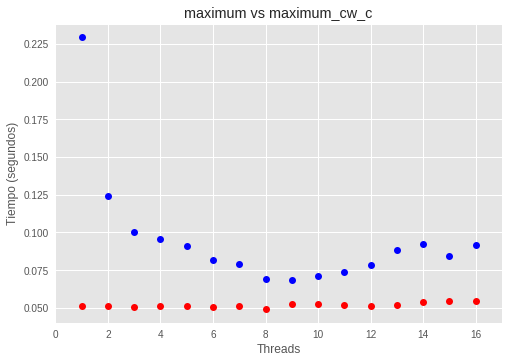

In [16]:

################################
# Levanto los datos, y los veo #
################################


df_exp1 = []
df_exp1_nombres = []
for filename in sorted(os.listdir('./exp1/resultados')):
    df_exp1_nombres.append(filename)
    primero = True
    for file_exp in sorted(os.listdir('./exp1/resultados/'+str(filename))):
        df_actual = pd.read_csv('./exp1/resultados/'+str(filename)+'/'+str(file_exp))
        if(primero):
            df_exp1.append(df_actual)
            primero = False
        else:
            df_exp1[-1]['tiempo'] = df_exp1[-1]['tiempo'] + df_actual['tiempo']

for i in range(0,len(df_exp1)):
    df_exp1[i]['tiempo'] = df_exp1[i]['tiempo'] / 10
            
for i in range(0,len(df_exp1_nombres)):
    print(str(i) + ' ' + str(df_exp1_nombres[i]))

#####################
# Hago los gráficos #
#####################
#graficador(data, tagX, tadY, title, labelX, labelY, interp, col)

#2 maximum (AZUL) vs 3 maximum_cw_c (ROJO)
graficador(df_exp1[2], 'threads', 'tiempo', 'maximum vs maximum_cw_c', 'Threads', 'Tiempo (segundos)', False, 'b')
graficador(df_exp1[3], 'threads', 'tiempo', 'maximum vs maximum_cw_c', 'Threads', 'Tiempo (segundos)', False, 'r')
#sns.plt.xlim((0,70))
mostrar()
